In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as mpl
import matplotlib

colors = list(mcolors.TABLEAU_COLORS.keys())*2

parentDirectory = os.path.abspath(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'

full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    'MX': 'Mexico',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark',
    'KE': 'Kenya', 
    'NG': 'Nigeria',
    'JP': 'Japan',
    'SE': 'Sweden',
    'ID': 'Indonesia',
    'EG': 'Egypt'
}

event_dicts = [{'country': 'AU',
  'end_md_1': '2020-06-07',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'BR',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-23',
  'start_md_2': np.nan},
 {'country': 'CA',
  'end_md_1': '2020-06-21',
  'start_md_1': '2020-03-19',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'end_md_1': '2020-05-09',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'end_md_1': '2020-05-07',
  'start_md_1': '2020-03-17',
  'start_md_2': np.nan},
 {'country': 'EG',
  'end_md_1': '2020-07-01',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'ES',
  'end_md_1': '2020-06-14',
  'start_md_1': '2020-03-17',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'end_md_1': '2020-06-08',
  'start_md_1': '2020-03-18',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'end_md_1': '2020-08-03',
  'start_md_1': '2020-03-23',
  'start_md_2': '2020-10-21'},
 {'country': 'ID',
  'end_md_1': '2020-08-10',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IN',
  'end_md_1': '2020-10-29',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IT',
  'end_md_1': '2020-06-06',
  'start_md_1': '2020-03-11',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'end_md_1': '2020-05-30',
  'start_md_1': '2020-04-12',
  'start_md_2': np.nan},
 {'country': 'KE',
  'end_md_1': '2020-10-04',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'MX',
  'end_md_1': '2020-10-06',
  'start_md_1': '2020-03-25',
  'start_md_2': np.nan},
 {'country': 'NG',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'SE',
  'end_md_1': '2020-04-09',
  'start_md_1': '2020-04-03',
  'start_md_2': np.nan},
 {'country': 'US',
  'end_md_1': '2020-06-11',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-11-26'}]
df_events = pd.DataFrame(event_dicts)

df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

df_agg = pd.read_pickle(DATA_DIR+'df_agg_cats.pickle')

In [2]:
df_agg

,country,category,volume_weekly_total,volume_weekly_total_l,volume_weekly_total_h,volume_percent_weekly_total
0,FR,dessert,2019-01-06 2039.955977 2019-01-13 2326.4...,2019-01-06 1835.859784 2019-01-13 2099.2...,2019-01-06 2268.661639 2019-01-13 2580.8...,2019-01-06 0.181580 2019-01-13 0.198787 ...
1,FR,soft drink,2019-01-06 121.671207 2019-01-13 129.083...,2019-01-06 114.391114 2019-01-13 121.331...,2019-01-06 129.498450 2019-01-13 137.439...,2019-01-06 0.010830 2019-01-13 0.011030 ...
2,FR,rice dish,2019-01-06 302.488958 2019-01-13 311.905...,2019-01-06 278.087672 2019-01-13 287.005...,2019-01-06 329.392011 2019-01-13 339.326...,2019-01-06 0.026925 2019-01-13 0.026651 ...
3,FR,soup,2019-01-06 401.235196 2019-01-13 366.711...,2019-01-06 369.185323 2019-01-13 337.439...,2019-01-06 436.562920 2019-01-13 399.011...,2019-01-06 0.035715 2019-01-13 0.031334 ...
4,FR,spice,2019-01-06 388.295133 2019-01-13 396.663...,2019-01-06 355.745896 2019-01-13 363.625...,2019-01-06 424.161427 2019-01-13 433.033...,2019-01-06 0.034563 2019-01-13 0.033893 ...
...,...,...,...,...,...,...
499,EG,cocktail,2019-01-06 10.667190 2019-01-13 9.11911...,2019-01-06 10.235867 2019-01-13 8.74368...,2019-01-06 11.296213 2019-01-13 9.72031...,2019-01-06 0.005317 2019-01-13 0.004847 ...
500,EG,salad,2019-01-06 30.043243 2019-01-13 29.89966...,2019-01-06 28.307436 2019-01-13 28.16831...,2019-01-06 32.025813 2019-01-13 31.78758...,2019-01-06 0.014974 2019-01-13 0.015892 ...
501,EG,sandwich,2019-01-06 13.229550 2019-01-13 8.20939...,2019-01-06 12.664763 2019-01-13 7.80812...,2019-01-06 13.858189 2019-01-13 8.67345...,2019-01-06 0.006594 2019-01-13 0.004363 ...
502,EG,sausage,2019-01-06 10.115526 2019-01-13 11.84954...,2019-01-06 9.609782 2019-01-13 11.31384...,2019-01-06 10.682971 2019-01-13 12.43453...,2019-01-06 0.005042 2019-01-13 0.006298 ...


In [3]:
#helpers

#R-style specification of RDD regression model

def generate_equation(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year + intervention_flag*np.power(k,3)*year"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year"
    return eq

def generate_equation_interactions(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category) + intervention_flag*np.power(k,3)*year*C(country)*C(category)"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category)"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category)"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year*C(country)*C(category)"
    return eq
    
def get_standard_error_sum(covariates):
    '''
    #95CI is approximated with +- 2 sum_variance_standard_error
    '''
    
    #get the variance covariance matrix
    vcov = result_interactions.cov_params()\
        .loc[covariates,covariates].values
    
    #calculate the sum of all pair wise covariances by summing up
    m_sum = np.sum(vcov)
    
    #variance of a sum of variables is the square root
    return np.sqrt((m_sum))

def make_stars(val):
    if val<0.0001:
        return '****'
    elif val<0.001:
        return '***'
    elif val<0.01:
        return '**'
    elif val<0.05:
        return '*'
    else:
        return ''

def make_star_ste(value,ste):
    if value>0 and value-2*ste>0:
        return '*'
    elif value<0 and value+2*ste<0:
        return '*'
    else:
        return ''

In [4]:
#control weeks
weeks_2019 = list(df_agg.iloc[0]['volume_weekly_total'].index)[:52]
#treated weeks
weeks_2020 = list(df_agg.iloc[0]['volume_weekly_total'].index)[52:]

In [5]:
l = []
for cnt, row in df_agg.iterrows():
    start_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_1']
    end_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['end_md_1']
    start_md2 = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_2']
    
    for week in zip(row['volume_weekly_total'].index,row['volume_weekly_total'].values,row['volume_percent_weekly_total'].values):
        
        entry = {}

        entry['country'] = row['country']
        entry['category'] = row['category']
        

        if week[0] in weeks_2020:
            date = pd.to_datetime(week[0])

            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2020'
            l.append(entry)

        elif week[0] in weeks_2019:
            date = pd.to_datetime(weeks_2020[weeks_2019.index(week[0])])
            
            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2019'
            l.append(entry)

df = pd.DataFrame(l)      

In [6]:
df.groupby('country').agg('k').max() 


country
AU    40
BR    40
CA    30
DE    39
DK    41
EG    40
ES    33
FR    33
GB    30
ID    40
IN    40
IT    34
JP    38
KE    40
MX    40
NG    40
SE    39
US    36
Name: k, dtype: int64

In [7]:
df.groupby('country').agg('k').min()

country
AU   -11
BR   -11
CA   -10
DE   -10
DK   -10
EG   -11
ES   -10
FR   -10
GB   -11
ID   -11
IN   -11
IT    -9
JP   -13
KE   -11
MX   -11
NG   -11
SE   -12
US   -10
Name: k, dtype: int64

In [8]:
df = df.loc[(df['k'] >= -30) & (df['k'] <= 30)]
df = df.loc[(df['country'].isin(list(full_names.keys())))]
df['intervention_flag'] = df['k'].apply(lambda x: 1 if x >= 0 else 0)

Text(0.5,1.05,'Italy, pastry and bakery product')

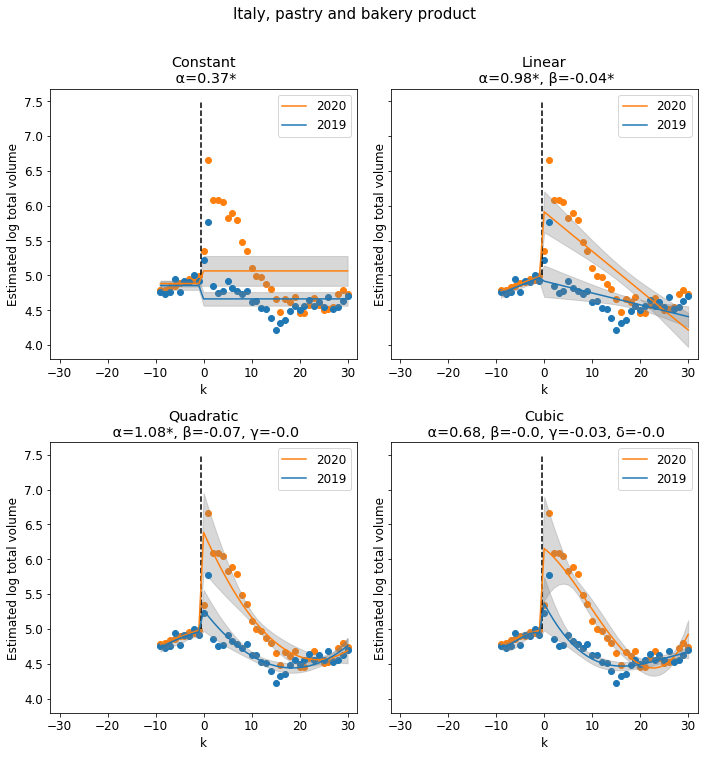

In [9]:
mpl.rcParams['font.size'] = 12
fig, axes = plt.subplots(2,2, figsize = (10,10), sharey = True)
country = 'IT'

for model in ['Constant','Linear','Quadratic','Cubic']:
    
    point = []
    conf = []
        
    k = 30
    
    df_temp = df.loc[(df['category'] == 'pastry and bakery product') & 
                                (df['country'] == country) & \
                                (df['k'] >= -k) & (df['k'] <= k)].copy()

    df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

    mod = smf.ols(generate_equation(model), 
                  data = df_temp)

    res = mod.fit(cov_type='hc0')
 
    if model == 'Constant':
        sbplt = axes[0,0]
        sbplt.set_title(model+'\n α='+str(round(res.params['intervention_flag:year[T.2020]'],2))+'*' if res.pvalues['intervention_flag:year[T.2020]']<0.05 else '')
        
    elif model == 'Linear':
        sbplt = axes[0,1]
        sbplt.set_title(model+'\n α='+str(round(res.params['intervention_flag:year[T.2020]'],2))+('*' if res.pvalues['intervention_flag:year[T.2020]']<0.05 else '') +
                        ', β='+str(round(res.params['intervention_flag:k:year[T.2020]'],2)) + ('*' if res.pvalues['intervention_flag:k:year[T.2020]']<0.05 else '') )

    elif model == 'Quadratic':
        sbplt = axes[1,0]
        sbplt.set_title(model+'\n α='+str(round(res.params['intervention_flag:year[T.2020]'],2))+('*' if res.pvalues['intervention_flag:year[T.2020]']<0.05 else '')+ 
                        ', β='+str(round(res.params['intervention_flag:k:year[T.2020]'],2)) + ('*' if res.pvalues['intervention_flag:k:year[T.2020]']<0.05 else '')+
                        ', γ='+str(round(res.params['intervention_flag:np.power(k, 2):year[T.2020]'],2)) + ('*' if res.pvalues['intervention_flag:np.power(k, 2):year[T.2020]']<0.05 else ''))

    else:
        sbplt = axes[1,1]
        sbplt.set_title(model+'\n α='+str(round(res.params['intervention_flag:year[T.2020]'],2))+('*' if res.pvalues['intervention_flag:year[T.2020]']<0.05 else '')+ 
                        ', β='+str(round(res.params['intervention_flag:k:year[T.2020]'],2)) + ('*' if res.pvalues['intervention_flag:k:year[T.2020]']<0.05 else '') +
                        ', γ='+str(round(res.params['intervention_flag:np.power(k, 2):year[T.2020]'],2)) + ('*' if res.pvalues['intervention_flag:np.power(k, 2):year[T.2020]']<0.05 else '') +
                        ', δ='+str(round(res.params['intervention_flag:np.power(k, 3):year[T.2020]'],2)) + ('*' if res.pvalues['intervention_flag:np.power(k, 3):year[T.2020]']<0.05 else ''))

    
    sbplt.vlines(-0.5,5,7.5, linestyle = '--')

    df_temp = df.loc[(df['category'] == 'pastry and bakery product') & 
                                (df['country'] == country) & \
                                (df['k'] >= -k) & (df['k'] <= k) & (df['year'] == '2020')].copy()

    df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)
    
    sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:orange')
    sbplt.fill_between(df_temp['k'].values,res.get_prediction(df_temp).conf_int()[:,0],
                 res.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

    sbplt.plot(df_temp['k'].values,res.get_prediction(df_temp).predicted_mean, color = 'tab:orange', label = '2020')

    
    
    
    df_temp = df.loc[(df['category'] == 'pastry and bakery product') & 
                                (df['country'] == country) & \
                                (df['k'] >= -k) & (df['k'] <= k) & (df['year'] == '2019')].copy()

    df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)
    
    sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:blue')
    sbplt.fill_between(df_temp['k'].values,res.get_prediction(df_temp).conf_int()[:,0],
                 res.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

    sbplt.plot(df_temp['k'].values,res.get_prediction(df_temp).predicted_mean, color = 'tab:blue', label = '2019')


    sbplt.legend()

    sbplt.set_xlabel('k')

    sbplt.set_xlim([-32,32])
    #sbplt.set_xlabel('Bandwidth (± weeks around intervention)')
    sbplt.set_ylabel('Estimated log total volume')
    #sbplt.set_ylim([-1.5,2.5])

plt.tight_layout()

fig.suptitle('Italy, pastry and bakery product', position = (0.5,1.05), fontsize= 15)

#plt.savefig(FIGURES_DIR+"example_italy_bread.pdf", bbox_inches='tight')

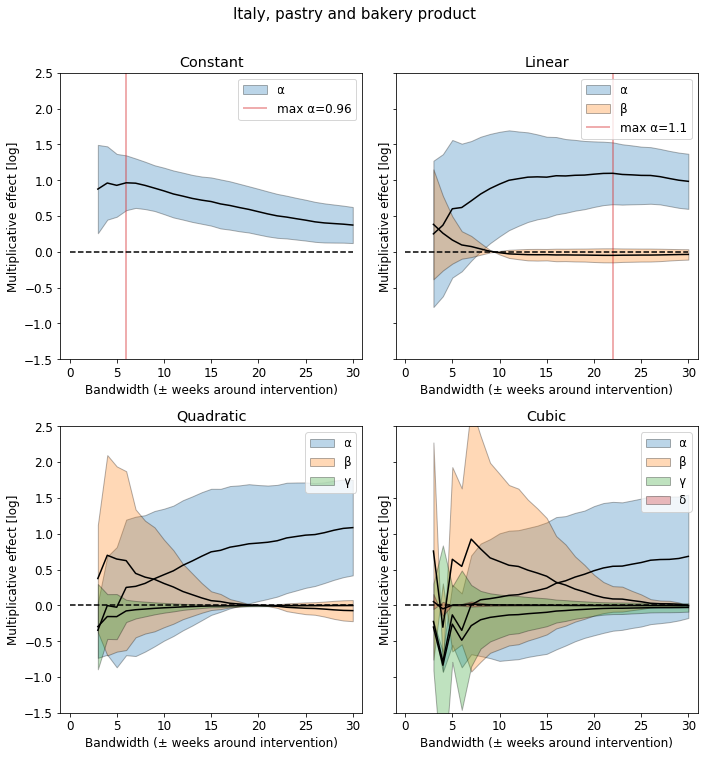

In [10]:
import matplotlib.pyplot as mpl
mpl.rcParams['font.size'] = 12

fig, axes = plt.subplots(2,2, figsize = (10,10), sharey = True)


for model in ['Constant','Linear','Quadratic','Cubic']:
    
    point = []
    conf = []
        
    for k in range(3,31):
    
        df_temp = df.loc[(df['category'] == 'pastry and bakery product') & 
                                    (df['country'] == 'IT') & \
                                    (df['k'] >= -k) & (df['k'] <= k)].copy()
        
        df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

        mod = smf.ols(generate_equation(model), 
                      data = df_temp)

        res = mod.fit(cov_type='hc0')
        
    
        if model == 'Cubic':
            point.append([res.params['intervention_flag:year[T.2020]'], res.params['intervention_flag:k:year[T.2020]'], res.params['intervention_flag:np.power(k, 2):year[T.2020]'], res.params['intervention_flag:np.power(k, 3):year[T.2020]']])
            conf.append([res.bse['intervention_flag:year[T.2020]'], res.params['intervention_flag:k:year[T.2020]'], res.params['intervention_flag:np.power(k, 2):year[T.2020]'], res.params['intervention_flag:np.power(k, 3):year[T.2020]']])
        elif model == "Quadratic":
            point.append([res.params['intervention_flag:year[T.2020]'], res.params['intervention_flag:k:year[T.2020]'], res.params['intervention_flag:np.power(k, 2):year[T.2020]']])
            conf.append([res.bse['intervention_flag:year[T.2020]'], res.params['intervention_flag:k:year[T.2020]'], res.params['intervention_flag:np.power(k, 2):year[T.2020]']])
        elif model == "Linear":
            point.append([res.params['intervention_flag:year[T.2020]'], res.params['intervention_flag:k:year[T.2020]']])
            conf.append([res.bse['intervention_flag:year[T.2020]'], res.params['intervention_flag:k:year[T.2020]']])
        elif model == 'Constant':
            point.append([res.params['intervention_flag:year[T.2020]']])
            conf.append([res.bse['intervention_flag:year[T.2020]']])
            
    if model == 'Constant':
        sbplt = axes[0,0]
        sbplt.plot(range(3,31), [i[0] for i in point], color = 'black')
        sbplt.fill_between(range(3,31),
                           np.array([i[0] for i in point]) - 2*np.array([i[0] for i in conf]), 
                           np.array([i[0] for i in point]) + 2*np.array([i[0] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'α')
        idmax = np.argmax(np.array([i[0] for i in point]))
        sbplt.vlines(range(3,31)[idmax],-1.5,2.5, alpha = 0.5, color = 'tab:red', label = 'max α='+str(round(np.max(np.array([i[0] for i in point])),2)))
        
    elif model == 'Linear':
        sbplt = axes[0,1]
        sbplt.plot(range(3,31), [i[0] for i in point], color = 'black')
        sbplt.fill_between(range(3,31), 
                           np.array([i[0] for i in point]) - 2*np.array([i[0] for i in conf]),
                           np.array([i[0] for i in point]) + 2*np.array([i[0] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'α')
        
        sbplt.plot(range(3,31), [i[1] for i in point], color = 'black')
        sbplt.fill_between(range(3,31), 
                           np.array([i[1] for i in point]) - 2*np.array([i[1] for i in conf]),
                           np.array([i[1] for i in point]) + 2*np.array([i[1] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'β')
        idmax = np.argmax(np.array([i[0] for i in point]))
        sbplt.vlines(range(3,31)[idmax],-1.5,2.5, alpha = 0.5, color = 'tab:red', label = 'max α='+str(round(np.max(np.array([i[0] for i in point])),2)))
        
    elif model == 'Quadratic':
        sbplt = axes[1,0]
        sbplt.plot(range(3,31), [i[0] for i in point], color = 'black')
        sbplt.fill_between(range(3,31),
                           np.array([i[0] for i in point]) - 2*np.array([i[0] for i in conf]), 
                           np.array([i[0] for i in point]) + 2*np.array([i[0] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'α')
        
        sbplt.plot(range(3,31), [i[1] for i in point], color = 'black')
        sbplt.fill_between(range(3,31), 
                           np.array([i[1] for i in point]) - 2*np.array([i[1] for i in conf]),
                           np.array([i[1] for i in point]) + 2*np.array([i[1] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'β')
    
        sbplt.plot(range(3,31), [i[2] for i in point], color = 'black')
        sbplt.fill_between(range(3,31), 
                           np.array([i[2] for i in point]) - 2*np.array([i[2] for i in conf]),
                           np.array([i[2] for i in point]) + 2*np.array([i[2] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'γ')
    
    else:
        sbplt = axes[1,1]
        sbplt.plot(range(3,31), [i[0] for i in point], color = 'black')
        sbplt.fill_between(range(3,31),
                           np.array([i[0] for i in point]) - 2*np.array([i[0] for i in conf]), 
                           np.array([i[0] for i in point]) + 2*np.array([i[0] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'α')
       
        sbplt.plot(range(3,31), [i[1] for i in point], color = 'black')
        sbplt.fill_between(range(3,31), 
                           np.array([i[1] for i in point]) - 2*np.array([i[1] for i in conf]),
                           np.array([i[1] for i in point]) + 2*np.array([i[1] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'β')
        
        sbplt.plot(range(3,31), [i[2] for i in point], color = 'black')
        sbplt.fill_between(range(3,31), 
                           np.array([i[2] for i in point]) - 2*np.array([i[2] for i in conf]),
                           np.array([i[2] for i in point]) + 2*np.array([i[2] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'γ')
        
        sbplt.plot(range(3,31), [i[3] for i in point], color = 'black')
        sbplt.fill_between(range(3,31), 
                           np.array([i[3] for i in point]) - 2*np.array([i[3] for i in conf]),
                           np.array([i[3] for i in point]) + 2*np.array([i[3] for i in conf]), alpha = 0.3, edgecolor = 'black', label = 'δ')
    
    
    sbplt.set_title(model)
    sbplt.legend(loc = "upper right")
    sbplt.hlines(0,0,30, linestyle = '--')
    sbplt.set_xticks(range(0,31)[::5])
    sbplt.set_xticklabels(range(0,31)[::5])
    sbplt.set_xlim([-1,31])
    sbplt.set_xlabel('Bandwidth (± weeks around intervention)')
    sbplt.set_ylabel('Multiplicative effect [log]')
    sbplt.set_ylim([-1.5,2.5])

plt.tight_layout()

fig.suptitle('Italy, pastry and bakery product', position = (0.5,1.05), fontsize= 15)


plt.savefig(FIGURES_DIR+"example_italy_bread_vary_bandwidth.pdf", bbox_inches='tight')

In [11]:
cats = list(df['category'].unique())
k = 30

In [12]:
#select around the cutoff
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()
#log outcomes
df_temp['volume_total'] = df_temp['volume_total'].apply(lambda x: np.log(x + 0.001))
#fit ols
mod = smf.ols(generate_equation_interactions('Quadratic'), data = df_temp)
result_interactions = mod.fit(cov_type='hc0')

In [13]:
default_country = 'AU'
default_category = 'beef dish'

alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'
gamma_baseline = 'intervention_flag:np.power(k, 2):year[T.2020]'

list_results = []

for country in full_names.keys():
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            
            total_beta = (result_interactions.params[beta_baseline])
            total_beta_error = (result_interactions.bse[beta_baseline])
            
            total_gamma = (result_interactions.params[gamma_baseline])
            total_gamma_error = (result_interactions.bse[gamma_baseline])
            
        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) 
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category]))

        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) 
            total_beta_error = (get_standard_error_sum([beta_baseline,
                                                         beta_baseline + suffix_country]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline,
                                                         gamma_baseline + suffix_country]))

        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) \
                    + (result_interactions.params[beta_baseline + suffix_country + suffix_category])
            
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category,
                                                         beta_baseline + suffix_country, 
                                                         beta_baseline + suffix_country + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) \
                    + (result_interactions.params[gamma_baseline + suffix_country + suffix_category])
            
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category,
                                                         gamma_baseline + suffix_country, 
                                                         gamma_baseline + suffix_country + suffix_category]))
            
        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error
        entry['beta'] = total_beta
        entry['beta_ste'] = total_beta_error
        entry['gamma'] = total_gamma
        entry['gamma_ste'] = total_gamma_error
        
        list_results.append(entry)
        
df_results = pd.DataFrame(list_results)
df_results_interactions = pd.DataFrame(list_results)

## a) For all categories, show alpha in different countries

In [14]:
#sort by the size of significant effects

In [15]:
df_results['is_sign'] = ((df_results['alpha']>0) & ((df_results['alpha'] - 2*df_results['alpha_ste'])>0)) | \
((df_results['alpha']<0) & ((df_results['alpha'] + 2*df_results['alpha_ste'])<0))

In [16]:
cats_sorted = list(df_results.groupby('category')['alpha'].agg('median').sort_values(ascending = False).index)

countries_sorted = list(df_results.groupby('country')['alpha'].\
     agg('mean').sort_values(ascending = False).index)



In [17]:
cats_sorted 

['pastry and bakery product',
 'bread and flatbread',
 'pie',
 'potato dish',
 'stew',
 'sauce',
 'cheese',
 'dessert',
 'chicken dish',
 'pasta, pizza and noodle dish',
 'pork dish',
 'sausage',
 'egg dish',
 'rice dish',
 'vegetable and legume',
 'fruit',
 'fish dish',
 'soup',
 'spice',
 'beef dish',
 'snack',
 'salad',
 'herb',
 'sandwich',
 'wine, beer and liquor',
 'cocktail',
 'soft drink',
 'lamb dish']

In [18]:
countries_sorted

['ES',
 'GB',
 'FR',
 'KE',
 'IT',
 'IN',
 'ID',
 'BR',
 'CA',
 'US',
 'NG',
 'MX',
 'AU',
 'DE',
 'EG',
 'DK',
 'SE',
 'JP']

In [19]:
sorterIndex = dict(zip(countries_sorted, range(len(countries_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

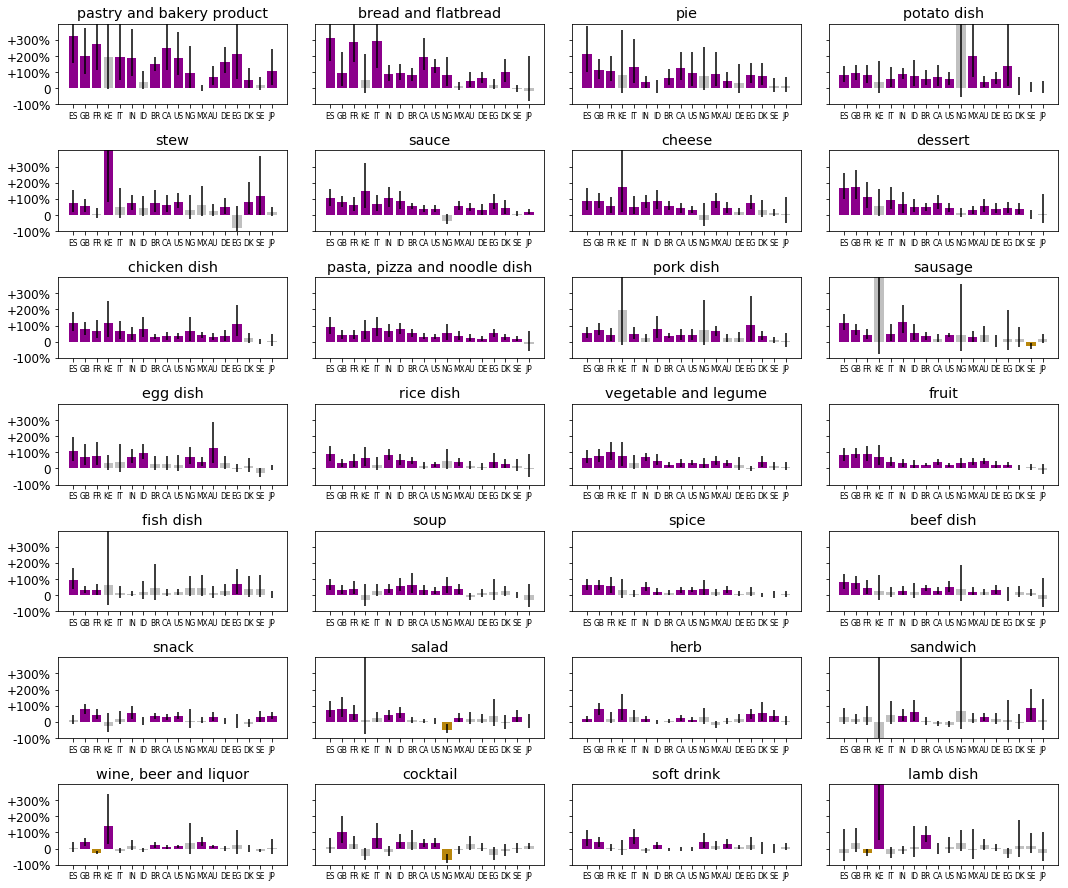

In [20]:
fig, axes = plt.subplots(7,4, figsize = (15,12.5), sharey = True)

for cnt,c in enumerate(cats_sorted):
    sbplt = axes[math.floor(cnt/4), cnt%4]
    x = df_results.loc[df_results['category'] == c].iloc[sort_by_custom_dict(df_results.loc[df_results['category'] == c]['country'])][['alpha','country','alpha_ste']]
    
    colors_bars = []
    for i in range(18):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('silver')
            
    #sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1), yerr = 2*x['alpha_ste'].apply(lambda x: np.exp(x)-1), color = colors_bars)
    
    sbplt.bar(range(18),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars)
    
    #print(c)
    #print(x['alpha'].apply(lambda x: np.exp(x)-1))
    sbplt.set_xticks(range(18))
    sbplt.set_xticklabels(x['country'], fontsize= 7.5)
    sbplt.set_title(c)
    
    sbplt.set_yticks([-1,0,1,2,3])
    sbplt.set_yticklabels(["-100%","0","+100%","+200%","+300%"])
    sbplt.set_ylim([-1,4])

#fig.suptitle("α", position = (0.5, 1.05))
plt.tight_layout()

plt.savefig(FIGURES_DIR+"cats_effects.pdf", bbox_inches='tight')

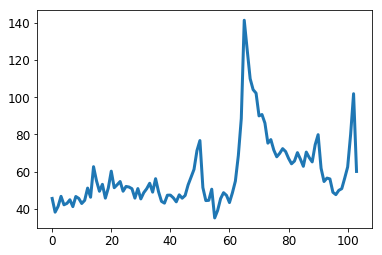

In [21]:
plt.plot(df_agg.loc[(df_agg['country']=='AU')&(df_agg['category']=='pastry and bakery product')]\
         ['volume_weekly_total'].values[0].values, linewidth = 3)

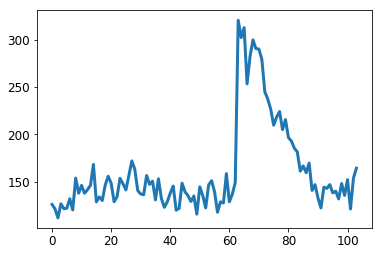

In [22]:
plt.plot(df_agg.loc[(df_agg['country']=='BR')&(df_agg['category']=='pastry and bakery product')]\
         ['volume_weekly_total'].values[0].values, linewidth = 3)

## b) In all countries, show alpha in different categories

In [23]:
sorterIndex = dict(zip(cats_sorted, range(len(cats_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

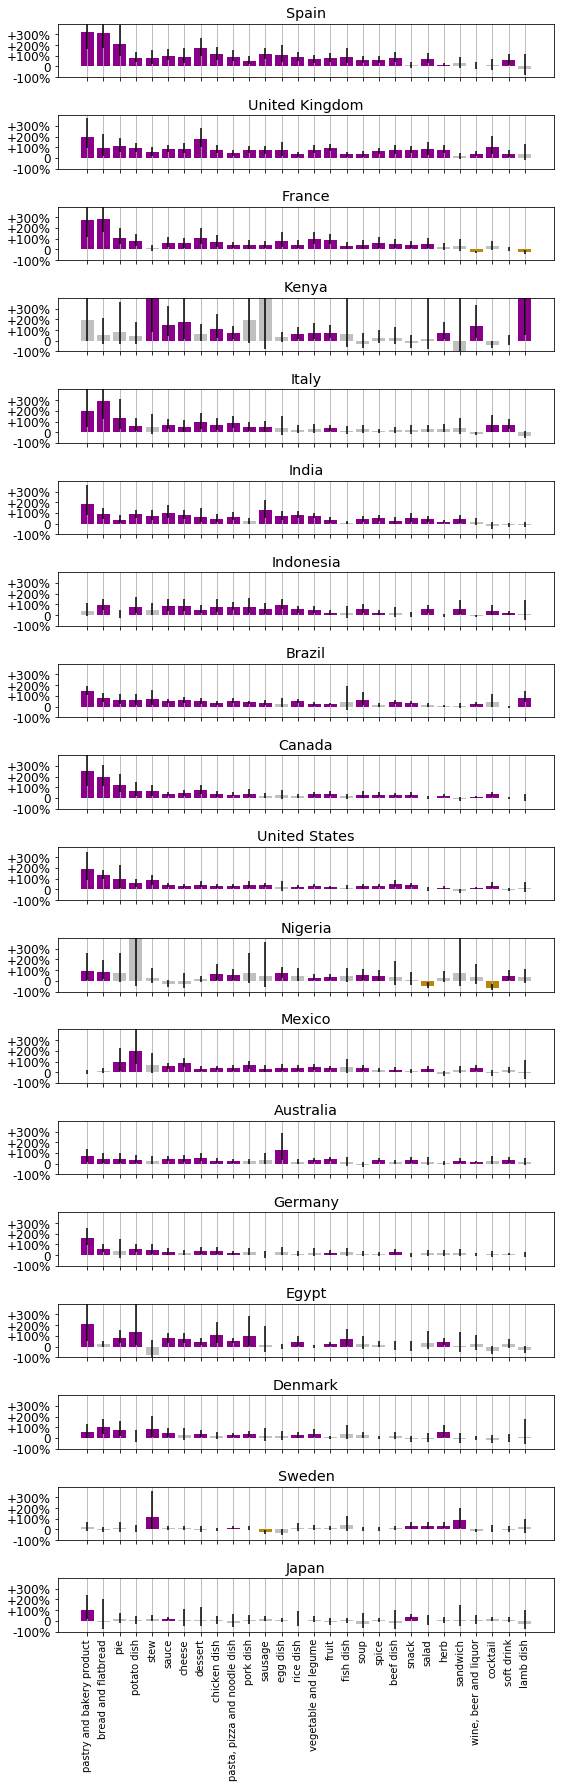

In [24]:
fig, axes = plt.subplots(18,1, figsize = (8,25), sharey = True)

for cnt,country in enumerate(countries_sorted):    
    sbplt = axes[cnt]
    
    x = df_results.loc[df_results['country'] == country].iloc[sort_by_custom_dict(df_results.loc[df_results['country'] == country]['category'])][['alpha','category','alpha_ste']]
    #x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    
    colors_bars = []
    for i in range(28):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('silver')
            
            
    sbplt.bar(range(28),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars
           )
    
    sbplt.set_ylim([-1,4])

    sbplt.set_xticks(range(28))
    
    if cnt == 17:
        sbplt.set_xticklabels(x['category'], fontsize= 10, rotation = 90)
    else:
        sbplt.set_xticklabels([])

    sbplt.set_title(full_names[country])

    sbplt.set_yticks([-1,0,1,2,3])
    sbplt.set_yticklabels(["-100%","0","+100%","+200%","+300%"])
    sbplt.set_ylim([-1,4])
    
    sbplt.grid(axis = 'x')


#fig.suptitle("α", position = (0.5, 1))
plt.tight_layout()

plt.savefig(FIGURES_DIR+"cats_effects_by_country.pdf", bbox_inches='tight')

## Calculate overall increase in all foods in a country

In [25]:
country_totals = []

for c,gr in df_agg.groupby('country'):
    entry = {}
    entry['country'] = c
    entry['total'] = gr['volume_weekly_total'].sum()
    country_totals.append(entry)

In [26]:
country_totals = pd.DataFrame((country_totals))

In [27]:
country_totals = country_totals.loc[(country_totals['country'].isin(list(full_names.keys())))]

In [28]:
country_totals['average total'] = [i.mean() for i in country_totals['total'].values]

In [29]:
#country_totals = country_totals.sort_values(by = 'average total', ascending = False)

In [30]:
country_totals = country_totals.sort_values(by = 'country', ascending = True)

In [31]:
country_totals.sort_values(by = 'country', ascending = True)

,country,total,average total
0,AU,2019-01-06 4958.753551 2019-01-13 4759.1...,5236.303772
1,BR,2019-01-06 35426.986225 2019-01-13 35634...,39513.998667
2,CA,2019-01-06 4718.781343 2019-01-13 4819.2...,4964.354277
3,DE,2019-01-06 2875.153364 2019-01-13 2856.8...,3303.478529
4,DK,2019-01-06 1621.047083 2019-01-13 1611.0...,1679.822766
5,EG,2019-01-06 2006.406839 2019-01-13 1881.4...,2017.461130
6,ES,2019-01-06 7674.619357 2019-01-13 8031...,9006.508779
7,FR,2019-01-06 11234.467467 2019-01-13 11703...,13537.821703
8,GB,2019-01-06 4847.063195 2019-01-13 4826.1...,5096.847804
9,ID,2019-01-06 14846.977332 2019-01-13 15416...,16620.574016


In [32]:
country_totals['full_name'] = country_totals['country'].apply(lambda x: full_names[x])
country_totals = country_totals.sort_values(by = 'full_name', ascending = True)

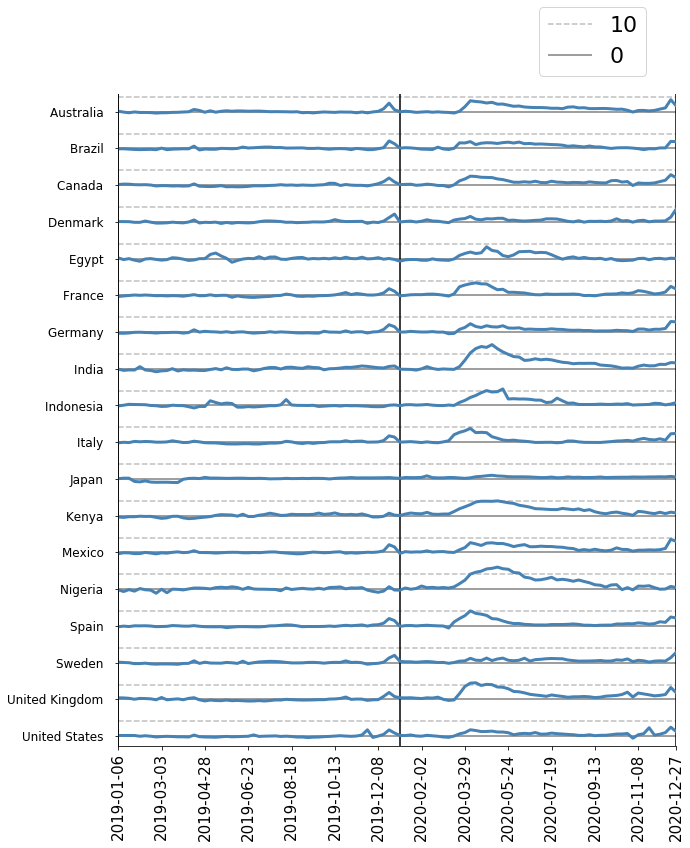

In [33]:
fig, ax = plt.subplots(1,1,figsize= (10,12))

matplotlib.rcParams.update({'font.size': 22})
c= 0


constant_shift = -25
for cnt,row in country_totals.iterrows():
    mean_2019 = row['total'].values[:52].mean()
    std_2019 = row['total'].values[:52].std()
    plt.plot(row['total'].index,constant_shift*c+((row['total'].values - mean_2019) / std_2019) ,
             linewidth = 3, color = 'steelblue')

    if cnt==0:
        plt.hlines(constant_shift*c+10,0,104, color = 'gray', linestyle = '--', alpha = 0.5, label = '10')
        plt.hlines(constant_shift*c,0,104, color = 'gray',label = '0')
    
        
    else:
        plt.hlines(constant_shift*c,0,104, color = 'gray')
    
        plt.hlines(constant_shift*c+10,0,104, color = 'gray', linestyle = '--', alpha = 0.5)
    
    #plt.hlines(-5*c-2,0,104, color = 'gray', linestyle = '--', alpha = 0.5)
    
    
    #plt.fill_between(row['total'].index, constant_shift*c-2, constant_shift*c+2, color = 'lightgray')
    c+=1
#plt.legend(loc = "upper right", fontsize= 10)
#plt.yscale('log')

plt.xticks(np.concatenate((row['total'].index[::8],
                           [row['total'].index[-1]][::8])), rotation=90, fontsize= 15);
#plt.xlim([-10,150])

#plt.title('Total interest in specific food \n entities (z-scores), 2019-2020.')



plt.vlines(52,-432,20, color = 'black')
plt.vlines(0,-432,20, color = 'black')
plt.vlines(103,-432,20, color = 'black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(row['total'].index[0],row['total'].index[-1])

plt.ylim([-432,12])
plt.yticks(np.array(range(18))*constant_shift, 
           [full_names[row['country']]+'  ' for cnt,row in country_totals.iterrows()])

plt.legend(loc = 'upper center', bbox_to_anchor=(0.85,1.15))

#ax2.set_ylabel('tect')
plt.savefig(FIGURES_DIR+"total_entities.pdf", bbox_inches='tight')

In [34]:
#Excluded Asian and African countries that dont have christian majority: 
#'IN','JP','ID','KE','NG','EG'


In [35]:
avg_peak = []
avg_total = []

for cnt,row in country_totals.iterrows():
    
    
    if (row['country']) in ['IN','JP','ID','NG','EG']:
        continue
    if (row['country']) == 'US':
        mean_2019 = row['total'].values[:52].mean()
        std_2019 = row['total'].values[:52].std()

        print(row['country'])
        print('surplus at Thanksgiving week')
        print(((row['total'].values - mean_2019) / std_2019)[46])
        print('surplus at Christmas week')
        print(((row['total'].values - mean_2019) / std_2019)[50])
        
        
        print('max pandemic suprlus')
        print(max(((row['total'].values - mean_2019) / std_2019)))
      
        
        
        print('max pandemic suprlus in Thanksgiving')
        print(round(max(((row['total'].values - mean_2019) / std_2019)[52:(52+26)]) / ((row['total'].values - mean_2019) / std_2019)[46],1))
        print('max pandemic suprlus in Christmas')
        print(round(max(((row['total'].values - mean_2019) / std_2019)[52:(52+26)]) / ((row['total'].values - mean_2019) / std_2019)[50],1))
        
        
        
        print('total 6 months pandemic suprlus')
        print(sum(((row['total'].values - mean_2019) / std_2019)[52:(52+26)]))
        print('total 6 months pandemic suprlus in Christmas')
        print(round(sum(((row['total'].values - mean_2019) / std_2019)[52:(52+26)]) / ((row['total'].values - mean_2019) / std_2019)[50],1))
        
        print('total 6 months pandemic suprlus in Thanksgiving')
        print(round(sum(((row['total'].values - mean_2019) / std_2019)[52:(52+26)]) / ((row['total'].values - mean_2019) / std_2019)[46],1))
        
        
        print('\n')
    else:
        mean_2019 = row['total'].values[:52].mean()
        std_2019 = row['total'].values[:52].std()
        avg_peak.append(max(((row['total'].values - mean_2019) / std_2019)[52:(52+26)]) / ((row['total'].values - mean_2019) / std_2019)[50])
        avg_total.append(sum(((row['total'].values - mean_2019) / std_2019)[52:(52+26)]) / ((row['total'].values - mean_2019) / std_2019)[50])
        continue
        print(row['country'])

        print('surplus at Christmas week')
        print(((row['total'].values - mean_2019) / std_2019)[50])
        
        
        print('max pandemic suprlus')
        print(max(((row['total'].values - mean_2019) / std_2019)))
        
        
        print('max pandemic suprlus in Christmas')
        print(round(max(((row['total'].values - mean_2019) / std_2019)) / ((row['total'].values - mean_2019) / std_2019)[50],1))
        
        
        print('total 6 months pandemic suprlus')
        print(sum(((row['total'].values - mean_2019) / std_2019)[52:(52+26)]))
        print('total 6 months pandemic suprlus in Christmas')
        print(round(sum(((row['total'].values - mean_2019) / std_2019)[52:(52+26)]) / ((row['total'].values - mean_2019) / std_2019)[50],1))
        
        
        print('\n')


US
surplus at Thanksgiving week
4.208634079714777
surplus at Christmas week
4.14586725971794
max pandemic suprlus
5.991799258281536
max pandemic suprlus in Thanksgiving
1.0
max pandemic suprlus in Christmas
1.0
total 6 months pandemic suprlus
37.31232755862514
total 6 months pandemic suprlus in Christmas
9.0
total 6 months pandemic suprlus in Thanksgiving
8.9




In [36]:
print(round(np.mean(avg_peak),1))
print(round(np.mean(avg_total),1))

1.9
18.8


In [37]:
list_total_effects = []

for cnt,row in country_totals.iterrows():
    
    l = []
    start_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_1']
    end_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['end_md_1']
    start_md2 = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_2']

    for week in zip(row['total'].index,row['total'].values):

        entry = {}


        if week[0] in weeks_2020:
            date = pd.to_datetime(week[0])

            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['year'] = '2020'
            l.append(entry)

        elif week[0] in weeks_2019:
            date = pd.to_datetime(weeks_2020[weeks_2019.index(week[0])])

            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['year'] = '2019'
            l.append(entry)

    df_totals = pd.DataFrame(l)
    
    k = 30
    df_totals['intervention_flag'] = df_totals['k'].apply(lambda x: 1 if x >= 0 else 0)
    df_temp = df_totals.loc[(df_totals['k'] >= -k) & (df_totals['k'] <= k)].copy()
    df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)
    
    mod = smf.ols(generate_equation('Quadratic'), data = df_temp)
    result = mod.fit(cov_type='hc0')

    alpha = 'intervention_flag:year[T.2020]'

    entry = {}
    entry['alpha_param'] = result.params[alpha]
    entry['alpha_ste'] = result.bse[alpha]
    entry['country'] = row['country']
    list_total_effects.append(entry)


In [38]:
list_total_effects

[{'alpha_param': 0.30794676053739867,
  'alpha_ste': 0.08208448631735227,
  'country': 'AU'},
 {'alpha_param': 0.3369541684051125,
  'alpha_ste': 0.055161501901557705,
  'country': 'BR'},
 {'alpha_param': 0.35373717975463315,
  'alpha_ste': 0.08340778089671533,
  'country': 'CA'},
 {'alpha_param': 0.22244612984307288,
  'alpha_ste': 0.058518332253662105,
  'country': 'DK'},
 {'alpha_param': 0.28164015651118035,
  'alpha_ste': 0.058126648938692384,
  'country': 'EG'},
 {'alpha_param': 0.5637338528357745,
  'alpha_ste': 0.13247973428433207,
  'country': 'FR'},
 {'alpha_param': 0.23750750383182329,
  'alpha_ste': 0.09049655208620798,
  'country': 'DE'},
 {'alpha_param': 0.4279126621544318,
  'alpha_ste': 0.10319037556615865,
  'country': 'IN'},
 {'alpha_param': 0.3695112515296364,
  'alpha_ste': 0.10121956521381151,
  'country': 'ID'},
 {'alpha_param': 0.4934554523702608,
  'alpha_ste': 0.1460779756178801,
  'country': 'IT'},
 {'alpha_param': -0.036531173759857205,
  'alpha_ste': 0.246492

In [39]:
matplotlib.rcParams.update({'font.size': 10})

ES
3.2499291333339295
GB
1.9976946812828698
FR
2.725405139624648
KE
1.954602910395618
IT
1.9589086999494314
IN
1.8671418130836033
ID
0.4073111418751594
BR
1.482107040023405
CA
2.512432134491463
US
1.8725070267513786
NG
0.9418744604581017
MX
-0.001194810354044784
AU
0.6815170515051221
DE
1.6134886979952454
EG
2.1259004413870803
DK
0.5347684391302923
SE
0.22099188925335622
JP
1.047888733358727


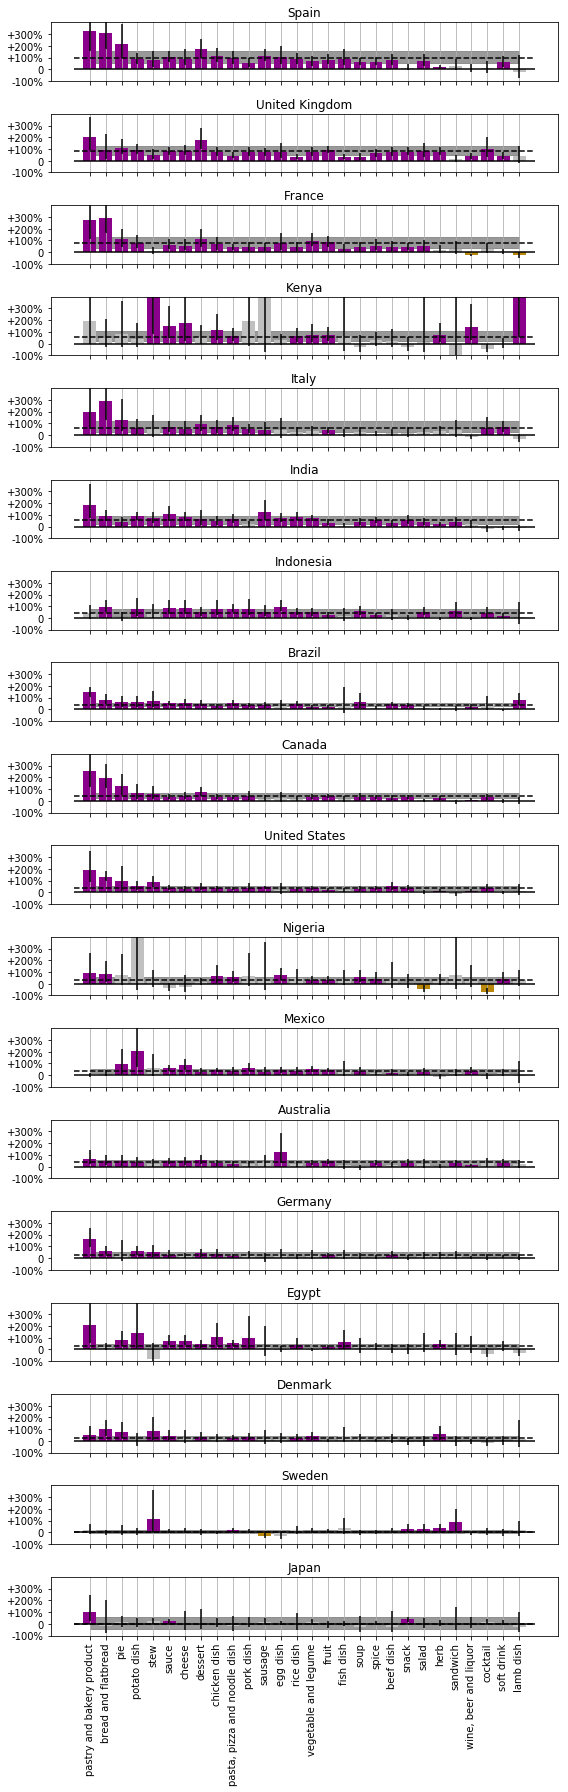

In [40]:
fig, axes = plt.subplots(18,1, figsize = (8,25), sharey = True)

matplotlib.rcParams.update({'font.size': 10})

for cnt,country in enumerate(countries_sorted):    
    sbplt = axes[cnt]
    
    x = df_results.loc[df_results['country'] == country].iloc[sort_by_custom_dict(df_results.loc[df_results['country'] == country]['category'])][['alpha','category','alpha_ste']]
    #x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    
    colors_bars = []
    for i in range(28):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('silver')
            
            
    sbplt.bar(range(28),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars
           )
    
    sbplt.set_ylim([-2,4])

    sbplt.set_xticks(range(28))
    
    if cnt == 17:
        sbplt.set_xticklabels(x['category'], fontsize= 10, rotation = 90)
    else:
        sbplt.set_xticklabels([])

    sbplt.set_title(full_names[country])

    sbplt.set_yticks([-1,0,1,2,3])
    sbplt.set_yticklabels(["-100%","0","+100%","+200%","+300%"])
    sbplt.set_ylim([-1,4])
    
    sbplt.grid(axis = 'x')
    
    coef_total = [i for i in list_total_effects if i['country']==country][0]['alpha_param']
    bse = [i for i in list_total_effects if i['country']==country][0]['alpha_ste']
    
    sbplt.hlines(np.exp(coef_total) - 1, -1,28, linestyle = '--')
    print(country)
    print(x['alpha'].apply(lambda x: np.exp(x)-1).iloc[0])
    
    
    sbplt.fill_between(range(28), np.exp(coef_total-2*bse) - 1, np.exp(coef_total+2*bse) - 1, 
                       color = 'grey', alpha = 0.8)

    sbplt.hlines(0, -1,28)
#fig.suptitle("α", position = (0.5, 1))
plt.tight_layout()

plt.savefig(FIGURES_DIR+"cats_effects_by_country.pdf", bbox_inches='tight')

## c) 2D visualization in category effect space

In [41]:
array_pca = []

for cnt,country in enumerate(countries_sorted):    
    x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    array_pca.append(x['alpha'].values)

transformed = StandardScaler().fit_transform(np.array(array_pca))

In [42]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
#pca = PCA(n_components=5)
transformed = embedding.fit_transform(transformed)

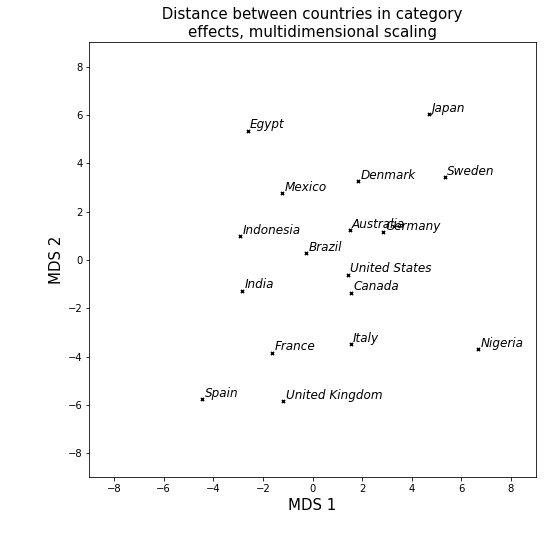

In [43]:
fig, axes = plt.subplots(1,1,figsize= (8,8))

for cnt,i in enumerate(transformed):
    plt.scatter(i[0],i[1], marker = 'x', s= 10, color = 'black')
    
    
    if countries_sorted[cnt] == 'US':
        plt.annotate(full_names[countries_sorted[cnt]],#+'\n'+\
                 #dict_max_mobility[countries_sorted[cnt]][0],
                (i[0]+0.1,i[1]+0.1), 
                 style = 'italic', fontsize = 12)
    else:
        plt.annotate(full_names[countries_sorted[cnt]], #+'\n'+\
                 #dict_max_mobility[countries_sorted[cnt]][0],
                     (i[0]+0.1,i[1]+0.1), 
                 style = 'italic', fontsize = 12)
        
    #plt.scatter(i[0],i[1],s = (dict_max_mobility[countries_sorted[cnt]][1]*3)**2, color = 'tab:blue', alpha = 0.2)
    
plt.ylim([-9,9])
plt.xlim([-9,9])
plt.xlabel('MDS 1', fontsize= 15)
           #+ str(100*embedding.explained_variance_ratio_[0])[:4]+"%)")
plt.ylabel('MDS 2', fontsize= 15)
           #str(100*embedding.explained_variance_ratio_[1])[:4]+"%)")
    
plt.title(' Distance between countries in category \neffects, multidimensional scaling', fontsize= 15);

#plt.savefig(FIGURES_DIR+"categories_mds.pdf", bbox_inches='tight')

In [44]:
array_pca = []

for cnt,country in enumerate(countries_sorted):    
    x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    array_pca.append(x['alpha'].values)
d = pd.DataFrame(np.array(array_pca))
d = d.set_index(pd.Index(countries_sorted))

## d) Get number of days until back to normal, for each country and for each category

In [45]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()
df_temp['volume_total'] = df_temp['volume_total'].apply(lambda x: np.log(x + 0.001))
mod = smf.ols(generate_equation_interactions('Quadratic'), data = df_temp)
result_interactions = mod.fit(cov_type='hc0')

In [46]:
default_country = 'AU'
default_category = 'beef dish'

alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'
gamma_baseline = 'intervention_flag:np.power(k, 2):year[T.2020]'

list_results = []

for country in full_names.keys():
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            
            total_beta = (result_interactions.params[beta_baseline])
            total_beta_error = (result_interactions.bse[beta_baseline])
            
            total_gamma = (result_interactions.params[gamma_baseline])
            total_gamma_error = (result_interactions.bse[gamma_baseline])
            
        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) 
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category]))

        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) 
            total_beta_error = (get_standard_error_sum([beta_baseline,
                                                         beta_baseline + suffix_country]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline,
                                                         gamma_baseline + suffix_country]))

        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) \
                    + (result_interactions.params[beta_baseline + suffix_country + suffix_category])
            
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category,
                                                         beta_baseline + suffix_country, 
                                                         beta_baseline + suffix_country + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) \
                    + (result_interactions.params[gamma_baseline + suffix_country + suffix_category])
            
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category,
                                                         gamma_baseline + suffix_country, 
                                                         gamma_baseline + suffix_country + suffix_category]))
            
        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error
        entry['beta'] = total_beta
        entry['beta_ste'] = total_beta_error
        entry['gamma'] = total_gamma
        entry['gamma_ste'] = total_gamma_error
        
        list_results.append(entry)
        
df_results = pd.DataFrame(list_results)

In [47]:
lst_heatmap = []
lst_heatmap_size_long_term = []

for c in cats:
    for country in sorted(list(full_names.keys())):
        #if c == 'bread and flatbread':
            entry = {}
            entry['country'] = country
            entry['category'] = c
            
            entry2 = {}
            entry2['country'] = country
            entry2['category'] = c
            #print(country, c)
            
            x = df_results.loc[(df_results['country'] == country) & (df_results['category'] == c)].iloc[0].copy()
            
            if (x['alpha']>0 and x['alpha']-2*x['alpha_ste']>0) or (x['alpha']<0 and x['alpha']+2*x['alpha_ste']<0):
                #print('significant short term increase or decrease')
                tmp = df_temp.loc[(df_temp['country'] == country)&(df_temp['category'] == c)].copy()

                #2019
                tmp1 = tmp.loc[tmp['year'] == '2019'].copy()

                tmp2 = tmp.loc[tmp['year'] == '2020'].copy()

                upper_error_2019 = result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).conf_int()[:,1]
                lower_error_2020 = result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).conf_int()[:,0]
                
                lower_error_2019 = result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).conf_int()[:,0]
                upper_error_2020 = result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).conf_int()[:,1]
                
                if ((x['alpha']>0 and x['alpha']-2*x['alpha_ste']>0) and sum(lower_error_2020 < upper_error_2019) == 0) or \
                ((x['alpha']<0 and x['alpha']-2*x['alpha_ste']<0) and sum(upper_error_2020 > lower_error_2019) == 0):
                    #print(c,country,'doesn fall back')
                    #print('doesn\'t fall back to normal')
                    mean2 = (np.mean(result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).predicted_mean[-1:]))
                    mean1 = (np.mean(result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).predicted_mean[-1:]))
                    
                    entry2['value'] = (np.exp(mean2) - np.exp(mean1)) / np.exp(mean1)

                    entry['value'] = 1000
                else:
                    if (x['alpha']>0 and x['alpha']-2*x['alpha_ste']>0):
                        v = (lower_error_2020 < upper_error_2019).argmax()
                        #print(c,country,'falls back in',v)
                        #print('falls back to normal in ',v)
                        entry['value'] = v
                        entry2['value'] = 0
                    elif (x['alpha']<0 and x['alpha']+2*x['alpha_ste']<0):
                        v = (upper_error_2020 > lower_error_2019).argmax()
                        #print(c,country,'falls back in',v)
                        #print('falls back to normal in ',v)
                        entry['value'] = v
                        entry2['value'] = 0
            else:
                entry['value'] = 0
                entry2['value'] = 0
                #print(c,country,'nosign changes')
                #('no significant short term changes')
            
            lst_heatmap.append(entry)
            lst_heatmap_size_long_term.append(entry2)

    

In [48]:
df_heatmap = pd.DataFrame(lst_heatmap)
matrix = np.zeros((28,18))

df_heatmap_longterm = pd.DataFrame(lst_heatmap_size_long_term)
matrix_longterm = np.zeros((28,18))

In [49]:
for cnt1,country in enumerate(countries_sorted):   
    for cnt2,cat in enumerate(cats_sorted):
        x = df_heatmap.loc[(df_heatmap['country'] == country) & (df_heatmap['category'] == cat)].iloc[0].copy()
        matrix[cnt2,cnt1] = (x['value'])    

In [50]:
for cnt1,country in enumerate(countries_sorted):   
    for cnt2,cat in enumerate(cats_sorted):
        x = df_heatmap_longterm.loc[(df_heatmap_longterm['country'] == country) & \
                                    (df_heatmap_longterm['category'] == cat)].iloc[0].copy()
        matrix_longterm[cnt2,cnt1] = (x['value'])    

In [51]:
mask = (matrix <2) + (matrix > 999)

In [52]:
annotations = np.empty((18,28), dtype='object')

for i in range(18):
    for j in range(28):
        if (matrix > 999)[j][i]:    
            annotations[i][j] = "+"
        else:
            annotations[i][j] = ""

In [53]:
annotations = np.empty((18,28), dtype='object')

for i in range(18):
    for j in range(28):
        if (matrix > 140)[j][i]:    
            if matrix_longterm[j][i]>0:
                annotations[i][j] = "+"+str(matrix_longterm[j][i]*100)[:4]+"%"
            else:
                annotations[i][j] = str(matrix_longterm[j][i]*100)[:4]+"%"
        else:
            annotations[i][j] = ""

### Plot separately time to normal

In [54]:
countries_sorted

['ES',
 'GB',
 'FR',
 'KE',
 'IT',
 'IN',
 'ID',
 'BR',
 'CA',
 'US',
 'NG',
 'MX',
 'AU',
 'DE',
 'EG',
 'DK',
 'SE',
 'JP']

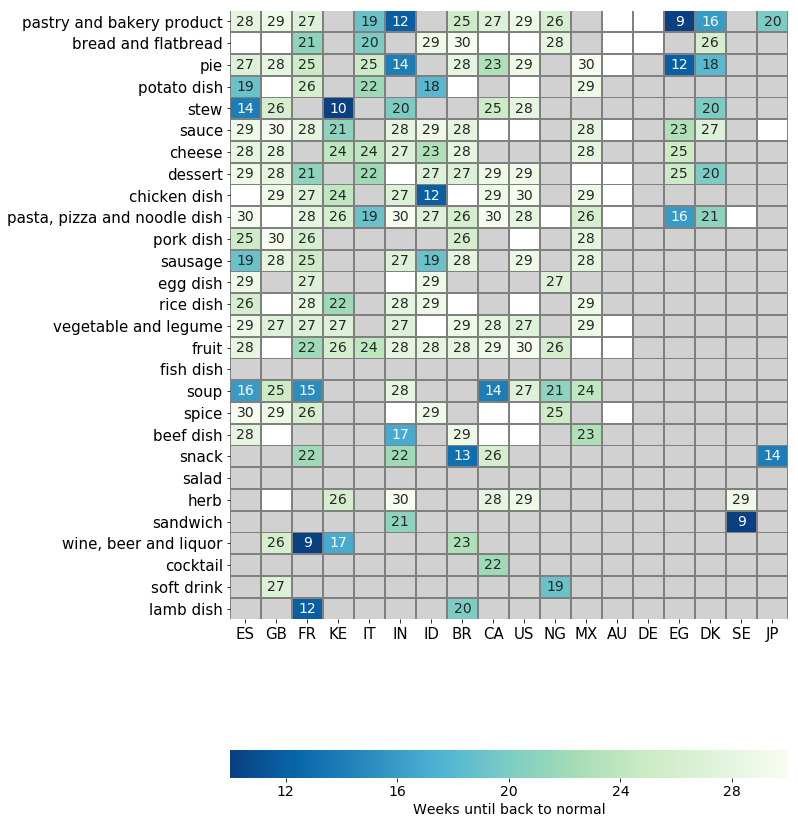

In [55]:
fig, ax = plt.subplots(1,1,figsize= (10,16))
matplotlib.rcParams.update({'font.size': 14})

sns.heatmap(matrix_longterm>0, cbar=False,  cmap = "Greys_r",  vmin = -2.5, vmax = 1, linewidths = 0.5,linecolor = 'gray',
            annot = False,  fmt="");

sns.heatmap(matrix, mask = mask, vmin = 10, vmax = 30, annot=True, fmt=".0f", 
            cmap="GnBu_r", cbar_kws=dict(use_gridspec=False,label='Weeks until back to normal',location="bottom"), 
            linewidths = 0.75,linecolor = 'gray')

ax.set_yticks(np.array(range(28))+0.5)
ax.set_yticklabels(cats_sorted, rotation = 0,fontsize = 15);

ax.set_xticks(np.array(range(18))+0.5)
ax.set_xticklabels(countries_sorted, rotation = 0, fontsize = 15);


plt.savefig(FIGURES_DIR+"categories_time.pdf", bbox_inches='tight')

### Plot separately longterm effect

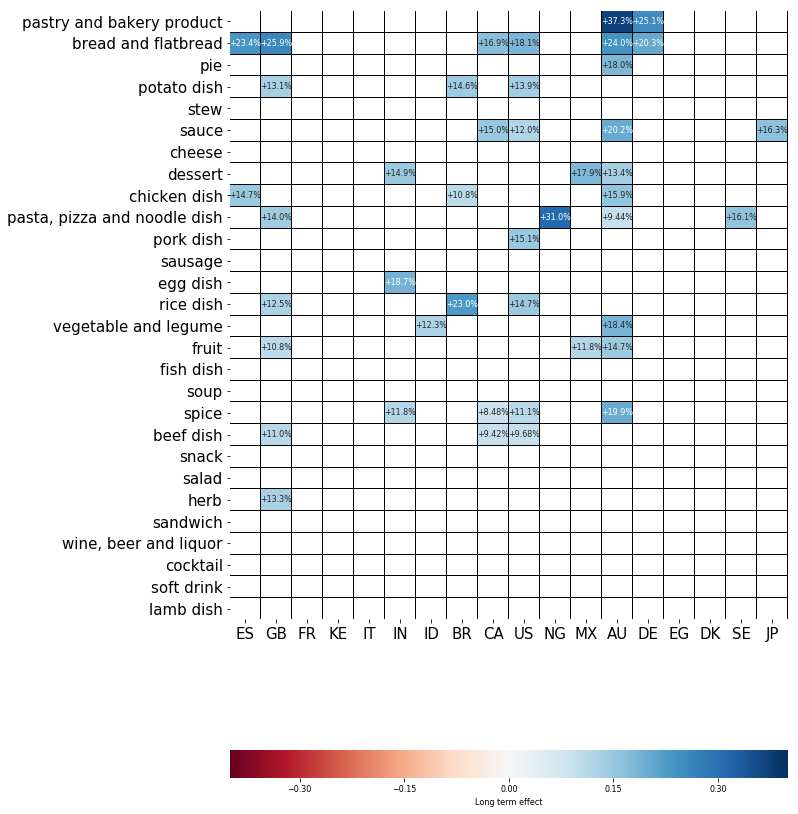

In [56]:
fig, ax = plt.subplots(1,1,figsize= (10,16))
matplotlib.rcParams.update({'font.size': 8})




sns.heatmap(matrix_longterm, vmin = -0.4, vmax = 0.4, cbar_kws=dict(use_gridspec=False,label='Long term effect',location="bottom"),  linewidths = 0,linecolor = 'white',
            cmap = "RdBu",
            annot = annotations.T,  fmt="")

sns.heatmap(matrix_longterm, mask = matrix_longterm >0.01,vmin = 0, cbar=False, linewidths = 0.01,linecolor = 'black',
            cmap = "Greys",
            annot = False,  fmt="")






ax.set_yticks(np.array(range(28))+0.5)
ax.set_yticklabels(cats_sorted, rotation = 0,fontsize = 15);

ax.set_xticks(np.array(range(18))+0.5)
ax.set_xticklabels(countries_sorted, rotation = 0, fontsize = 15);


plt.savefig(FIGURES_DIR+"categories_longterm.pdf", bbox_inches='tight')

## e) Make examples of the fit

Australia
 α=0.52* (+68.2%),
 β=-0.12*
Brazil
 α=0.91* (+148.2%),
 β=-0.0
Canada
 α=1.26* (+251.2%),
 β=-0.01
Germany
 α=0.96* (+161.3%),
 β=-0.09*
Denmark
 α=0.43* (+53.5%),
 β=0.01
Egypt
 α=1.14* (+212.6%),
 β=0.03
Spain
 α=1.45* (+325.0%),
 β=-0.14*
France
 α=1.32* (+272.5%),
 β=-0.03
United Kingdom
 α=1.1* (+199.8%),
 β=-0.15*
Indonesia
 α=0.34 (+40.7%),
 β=-0.04
India
 α=1.05* (+186.7%),
 β=0.01
Italy
 α=1.08* (+195.9%),
 β=-0.07
Japan
 α=0.72* (+104.8%),
 β=-0.09
Kenya
 α=1.08 (+195.5%),
 β=-0.13
Mexico
 α=-0.0 (+-0.1%),
 β=0.05
Nigeria
 α=0.66* (+94.2%),
 β=0.05
Sweden
 α=0.2 (+22.1%),
 β=-0.08
United States
 α=1.06* (+187.3%),
 β=0.03


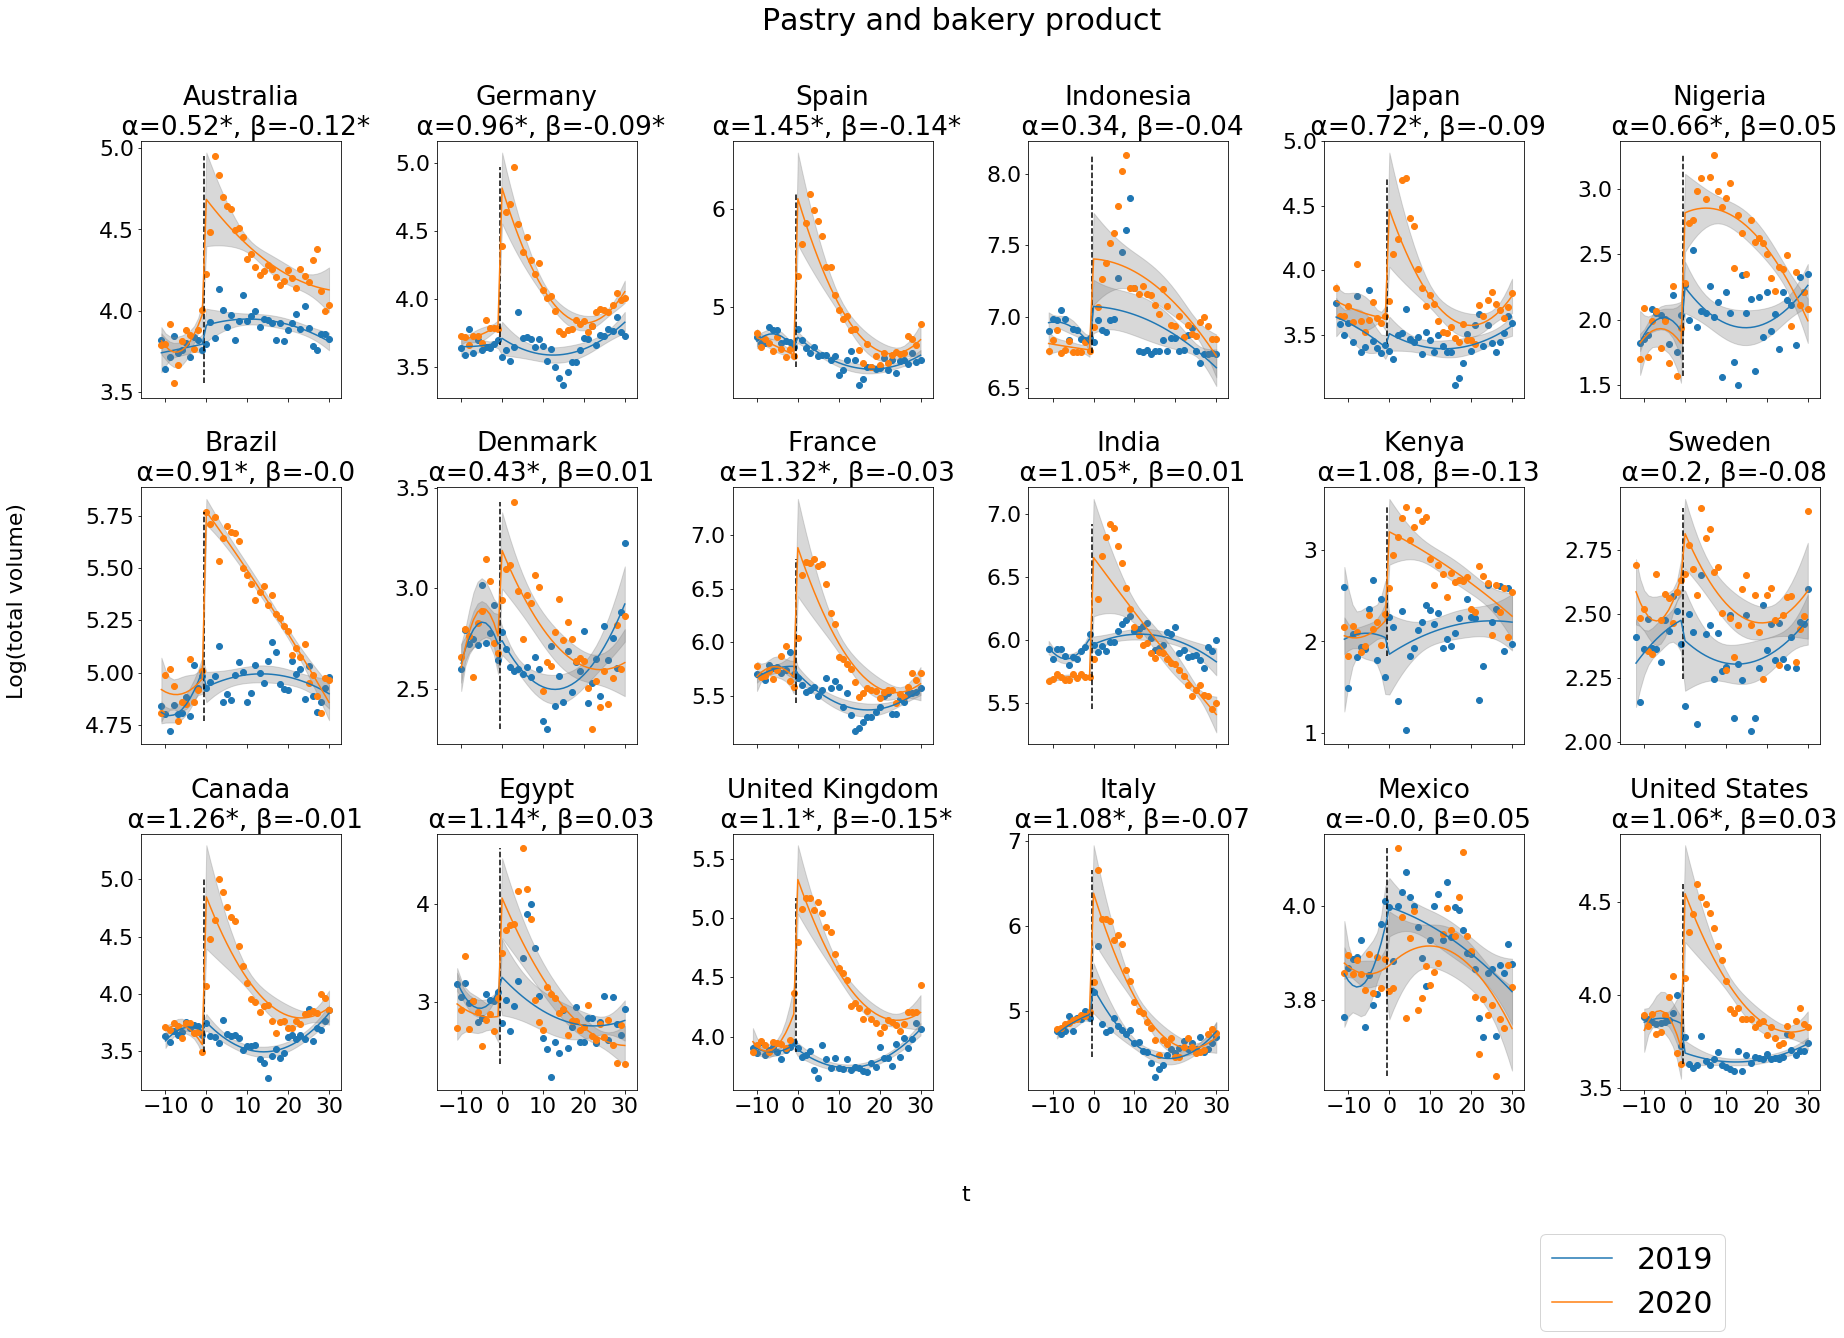

In [57]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(3,6, figsize= (25,15), sharex = True, sharey = False)

cnt = 0
for country,gr1 in df.groupby('country'):
    for category,gr2 in gr1.groupby('category'):
        if category == 'pastry and bakery product':
            gr2
            sbplt = ax[cnt%3, math.floor(cnt/3)]
            df_temp = gr2.loc[(gr2['k'] >= -k) & (gr2['k'] <= k)].copy()

            df_temp['volume_total'] = df_temp['volume_total'].apply(lambda x: np.log(x+0.001))

            df_temp = df_temp.loc[df_temp['year'] == '2019']

            sbplt.fill_between(df_temp['k'].values,
                                result_interactions.get_prediction(df_temp).conf_int()[:,0],
                                result_interactions.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

            sbplt.plot(df_temp['k'].values,
                       result_interactions.get_prediction(df_temp).predicted_mean, 
                       color = 'tab:blue', label = '2019')

            sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:blue')


            df_temp = gr2.loc[(gr2['k'] >= -k) & (gr2['k'] <= k)].copy()

            df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

            df_temp = df_temp.loc[df_temp['year'] == '2020']

            sbplt.fill_between(df_temp['k'].values,
                                result_interactions.get_prediction(df_temp).conf_int()[:,0],
                                result_interactions.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

            sbplt.plot(df_temp['k'].values,
                       result_interactions.get_prediction(df_temp).predicted_mean, 
                       color = 'tab:orange', label = '2020')

            sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:orange')

            
            
            sbplt.vlines(-0.5,(df_temp['volume_total'].values.min()),
                         (df_temp['volume_total'].values.max()), linestyle = '--')
            sbplt.set_xticks([-10,0,10,20,30])
            
            tmp = df_results_interactions.loc[(df_results_interactions['country'] == country)& (df_results_interactions['category'] == category)].iloc[0]
    
            sbplt.set_title(full_names[country]+'\n α='+str(round(tmp['alpha'],2))+(make_star_ste(tmp['alpha'],tmp['alpha_ste']))+
                        ', β='+str(round(tmp['beta'],2)) + (make_star_ste(tmp['beta'],tmp['beta_ste'])))
            
            print(full_names[country]+'\n α='+str(round(tmp['alpha'],2))+(make_star_ste(tmp['alpha'],tmp['alpha_ste'])) + ' (+' +str(round((np.exp(tmp['alpha'])-1)*100,1))+ '%)' +\
                        ',\n β='+str(round(tmp['beta'],2)) + (make_star_ste(tmp['beta'],tmp['beta_ste'])))
            
    cnt+=1

plt.tight_layout()
fig.text(-0.03, 0.5, 'Log(total volume)', va='center', rotation='vertical')
fig.text(0.5, -0.05, 't', va='center', rotation='horizontal')


fig.suptitle('Pastry and bakery product', position = (0.5,1.05), fontsize= 30)
sbplt.legend(bbox_to_anchor = (0.6,-0.5), fontsize= 30)

plt.savefig(FIGURES_DIR+"example_bakery_fitted.pdf", bbox_inches='tight')

Australia
 α=0.52* (+68.2%), β=-0.12*
Brazil
 α=0.91* (+148.2%), β=-0.0


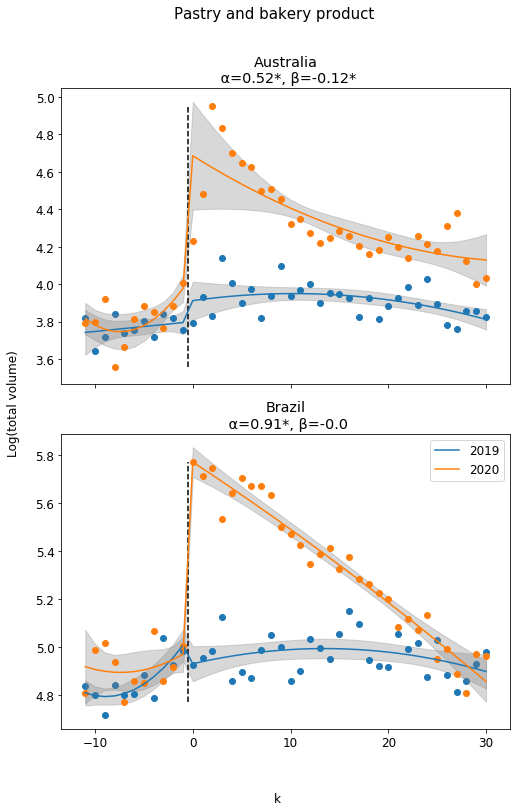

In [58]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(2,1, figsize= (7,10), sharex = True, sharey = False)

cnt = 0
for country,gr1 in df.groupby('country'):
    if cnt==2:
        break
    for category,gr2 in gr1.groupby('category'):
        if category == 'pastry and bakery product':
            gr2
            sbplt = ax[cnt]
            df_temp = gr2.loc[(gr2['k'] >= -k) & (gr2['k'] <= k)].copy()

            df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

            df_temp = df_temp.loc[df_temp['year'] == '2019']

            sbplt.fill_between(df_temp['k'].values,
                                result_interactions.get_prediction(df_temp).conf_int()[:,0],
                                result_interactions.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

            sbplt.plot(df_temp['k'].values,
                       result_interactions.get_prediction(df_temp).predicted_mean, 
                       color = 'tab:blue', label = '2019')

            sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:blue')


            df_temp = gr2.loc[(gr2['k'] >= -k) & (gr2['k'] <= k)].copy()

            df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

            df_temp = df_temp.loc[df_temp['year'] == '2020']

            sbplt.fill_between(df_temp['k'].values,
                                result_interactions.get_prediction(df_temp).conf_int()[:,0],
                                result_interactions.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

            sbplt.plot(df_temp['k'].values,
                       result_interactions.get_prediction(df_temp).predicted_mean, 
                       color = 'tab:orange', label = '2020')

            sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:orange')

            
            
            sbplt.vlines(-0.5,(df_temp['volume_total'].values.min()),
                         (df_temp['volume_total'].values.max()), linestyle = '--')
            sbplt.set_xticks([-10,0,10,20,30])
            
            tmp = df_results_interactions.loc[(df_results_interactions['country'] == country)& (df_results_interactions['category'] == category)].iloc[0]
    
            sbplt.set_title(full_names[country]+'\n α='+str(round(tmp['alpha'],2))+(make_star_ste(tmp['alpha'],tmp['alpha_ste']))+
                        ', β='+str(round(tmp['beta'],2)) + (make_star_ste(tmp['beta'],tmp['beta_ste'])))
            
            print(full_names[country]+'\n α='+str(round(tmp['alpha'],2))+(make_star_ste(tmp['alpha'],tmp['alpha_ste'])) + ' (+' +str(round((np.exp(tmp['alpha'])-1)*100,1))+ '%)' +\
                        ', β='+str(round(tmp['beta'],2)) + (make_star_ste(tmp['beta'],tmp['beta_ste'])))
            
    cnt+=1

plt.tight_layout()
fig.text(-0.03, 0.5, 'Log(total volume)', va='center', rotation='vertical')
fig.text(0.5, -0.05, 'k', va='center', rotation='horizontal')


fig.suptitle('Pastry and bakery product', position = (0.5,1.05), fontsize= 15)
sbplt.legend( fontsize= 12)

#plt.savefig(FIGURES_DIR+"example_annotated.pdf", bbox_inches='tight')